In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import neattext.functions as nfx
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [94]:
df= pd.read_csv('emotion_dataset.csv',nrows=10000)
df.head(5)

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [95]:
df['Emotion'].value_counts()

joy         3250
sadness     1866
fear        1507
anger       1271
surprise    1183
neutral      633
disgust      247
shame         43
Name: Emotion, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'joy'),
  Text(1, 0, 'sadness'),
  Text(2, 0, 'fear'),
  Text(3, 0, 'anger'),
  Text(4, 0, 'surprise'),
  Text(5, 0, 'neutral'),
  Text(6, 0, 'disgust'),
  Text(7, 0, 'shame')])

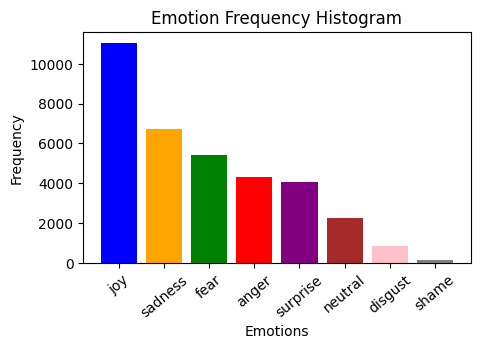

In [96]:
emotions = ['joy', 'sadness', 'fear', 'anger', 'surprise', 'neutral', 'disgust', 'shame']
frequencies = [11045, 6722, 5410, 4297, 4062, 2254, 856, 146]
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']

plt.figure(figsize=(5,3))
plt.bar(emotions,frequencies,color=colors)
plt.xlabel('Emotions')
plt.ylabel('Frequency')
plt.title('Emotion Frequency Histogram')
plt.xticks(rotation=40)

In [97]:
l=LabelEncoder()
df['Emotion']=l.fit_transform(df['Emotion'])
df.head(2)

,Emotion,Text
0,4,Why ?
1,3,Sage Act upgrade on my to do list for tommorow.


In [98]:
df['Text']= df['Text'].apply(nfx.remove_userhandles)
df['Text']=df['Text'].apply(nfx.remove_stopwords)
df.head(4)

,Emotion,Text
0,4,?
1,3,Sage Act upgrade list tommorow.
2,5,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,3,eye ! true hazel eye-and brilliant ! Regular f...


In [99]:
x=df['Text']
y=df['Emotion']

In [100]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [114]:
cv= CountVectorizer()
x_train_v= cv.fit_transform(x_train.values)

In [102]:
model = RandomForestClassifier(n_estimators=10)
model.fit(x_train_v,y_train)

RandomForestClassifier(n_estimators=10)

In [107]:
sentence = "water level rising near my home  #Flooding"
sentence_vectored = cv.transform([sentence])  
predicted_emotion = model.predict(sentence_vectored)
if predicted_emotion[0]==0:
    print('Anger')
elif predicted_emotion[0]==1:
    print('Disgust')
elif predicted_emotion[0]==2:
    print('Fear')
elif predicted_emotion[0]==3:
    print('Joy')
elif predicted_emotion[0]==4:
    print('Neutral')
elif predicted_emotion[0]==5:
    print('Sadness')
elif predicted_emotion[0]==6:
    print('Shame')
elif predicted_emotion[0]==7:
    print('Surprise')

Fear


In [108]:
sentence =  "Oh , that\'s too bad .Should I call a doctor ?"
sentence_vectored = cv.transform([sentence])  
predicted_emotion = model.predict(sentence_vectored)
if predicted_emotion[0]==0:
    print('Anger')
elif predicted_emotion[0]==1:
    print('Disgust')
elif predicted_emotion[0]==2:
    print('Fear')
elif predicted_emotion[0]==3:
    print('Joy')
elif predicted_emotion[0]==4:
    print('Neutral')
elif predicted_emotion[0]==5:
    print('Sadness')
elif predicted_emotion[0]==6:
    print('Shame')
elif predicted_emotion[0]==7:
    print('Surprise')

Sadness
